# Metody Analizy Danych - Projekt 1
_Paweł Kaczorowski_

### Spis treści
1. [Opis obiektów](#1.-Opis-obiekt%C3%B3w)
1. [Cel projektu](#2.-Cel-projektu)
1. [Opis danych](#3.-Opis-danych)
1. [Analiza danych](#4.-Analiza-danych)
  1. [Wskaźniki statystyczne](#Wska%C5%BAniki-statystyczne)
  2. [Standaryzacja](#Standaryzacja)
  1. [Unitaryzacja](#Unitaryzacja)
1. [Obserwacje i wnioski](#Obserwacje-i-wnioski)


- [inne wykresy](#Inne-wykresy)

## 1. Opis obiektów
Badam polskie województwa przy użyciu cech dla lat: 2010, 2015, 2016.

## 2. Cel projektu
Celem projektu jest przyjrzenie się produkcji rolnej w poszczególnych województwach oraz uporządkowanie i pogrupowanie ich według niżej opisanych cech.

## 3. Opis danych
Dane do analizy zaczerpnąłem z Roczników Statystycznych Rolnictwa GUS 2017, 2016 i 2011. Przedmiotem analizy są wskaźniki dotyczące produkcji rolnej:
* powierzchnia zasiewów [tys. ha] (tab. 93)
* powierzchnia zasiewów zbóż [tys. ha] (tab. 95)
* zbiory zbóż [tys. t] (tab. 101)
* zbiory ziemniaków [tys. t] (tab. 103)
* zbiory buraków cukrowych [tys. t] (tab. 104)
* bydło [tyś szt.] (tab. 130)
* produkcja żywca rzeźnego [tys. t] (tab. 136)
* produkcja mleka krowiego [mil. l] (tab. 141)
* drób kurzy [tys. szt] (stan w czerwcu) (tab. 134)
* produkcja jaj kurzych [mil. szt.] (tab. 145)
Dane te charakteryzują warunki funkcjonowania i produkcję różnych gałęzi rolnictwa. 

### TODO
- [x] indexy
- [x] wąsy
 - [x] elementy odstające
- [x] normalizacja 
 - [x] podstawowe wskaźniki: wartości standaryzowane
- [x] unitaryzacja
 - [x] podstawowe wskaźniki: wartości unitaryzowane
- [ ] stymualnty, destymulanty
 - [ ] stymulacja danych normalizowanych
 - [ ] stymulacja danych unitaryzowanych
- [ ] wskaźnik syntetyczny
- [ ] grupy premiowe
 - [ ] wizualizacja zbioru obiektów

## 4. Analiza danych

In [1]:
# import bibliotek do przetwarzania i wizualizacji danych

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import arkusza z danymi

raw = pd.read_csv('raw.csv', decimal=',')
pd.set_option('max_rows', 19)
pd.set_option('max_columns', 33)
# pd.set_option('precision', 2)
pd.options.display.float_format = '{0:.2f}'.format

raw

,cecha,Powierzchnia zasiewów [tys. ha],Unnamed: 2,Unnamed: 3,zbiory ziemniaków [tys. t],Unnamed: 5,Unnamed: 6,zbiory buraków cukrowych [tys. t],Unnamed: 8,Unnamed: 9,bydło [tyś szt.],Unnamed: 11,Unnamed: 12,produkcja mleka krowiego [mil. l],Unnamed: 14,Unnamed: 15,produkcja jaj kurzych [mil. szt.],Unnamed: 17,Unnamed: 18,ocena sanitarna – odrzucone mięso i podroby [%],Unnamed: 20,Unnamed: 21,przeciętne ceny skupu ziemniaków [zł / dt],Unnamed: 23,Unnamed: 24,przeciętne ceny skupu mleka [hl / dt],Unnamed: 26,Unnamed: 27,dochody jednostek samorządu tytułem podatku rolnego [mnl zł],Unnamed: 29,Unnamed: 30
0,nazwa,zasiew,zasiew,zasiew,ziemniaki,ziemniaki,ziemniaki,buraki,buraki,buraki,bydło,bydło,bydło,mleko,mleko,mleko,jaja,jaja,jaja,odrzucone_mieso,odrzucone_mieso,odrzucone_mieso,cena_ziemniak,cena_ziemniak,cena_ziemniak,cena_mleko,cena_mleko,cena_mleko,podatek_rolny,podatek_rolny,podatek_rolny
1,rok,2010,2015,2016,2010,2015,2016,2010,2015,2016,2010,2015,2016,2010,2015,2016,2010,2015,2016,2010,2015,2016,2010,2015,2016,2010,2015,2016,2010,2015,2016
2,POLSKA,"10365,9","10753,0","10640,0","8187,7","6151,8","8624,0","9972,6","9364,5","13523,8","5742,1","5960,7","5939,0","11921,1","12859,4","12867,2","11124,0","10473,9","10599,6","4,1","2,5","3,3","50,86","51,15","52,27","106,59","113,40","110,76","989,4",1593,"1513,5"
3,Dolnośląskie,"715,8","760,3","744,0","480,9","433,1","767,0","1028,3","657,8","1086,5","109,1","107,9","103,2","172,2","190,6","177,6","749,3","721,9","587,7","2,8","4,3","5,9","47,89","47,20","47,75","106,47","116,73","111,66","79,8","137,9","126,8"
4,Kujawsko-pomorskie,"898,5","946,0","916,9","430,9","427,4","603,0","1837,9","1750,7","2702,9","465,5","495,7","501,5","868,6","928,3","948,9","432,0","346,0","325,9",5,"3,1",3,"63,78","55,48","59,30","105,42","106,55","104,49","74,1",114,"112,1"
5,Lubelskie,"1009,3","1103,7","1074,4","746,1","456,0","607,8","1614,2","1674,6","2247,9","387,0","366,3","361,8","742,4","782,7","759,2","462,4","254,6","293,1","2,8","1,8","3,4","45,34","45,22","58,28","101,50","111,09","111,95",109,"151,2","154,2"
6,Lubuskie,"281,6","277,5","287,8","109,7","95,8","147,4","50,6","74,0","101,2","69,8","73,8","75,3","108,4","85,2","83,5","259,5","343,6","260,3",1,"5,2",0,"38,47","40,05","57,94","107,35","119,30","113,27","26,2","44,5","40,7"
7,Łódzkie,"735,7","765,3","746,4","903,3","674,0","1040,1","280,6","260,7","330,1","453,7","460,4","456,2","963,6","981,5","990,1","596,1","598,2","493,3","2,5","5,1","4,2","57,81","45,30","44,22","97,52","104,63","100,71","54,5","84,1","81,4"
8,Małopolskie,"290,9","313,0","299,7","524,3","524,0","524,4","44,4","57,8","86,5","196,6","173,5","181,2","353,0","324,6","360,5","506,1","556,2","664,3",4,"1,5","1,5","71,54","44,43","46,97","92,59","107,76","103,04","55,4","89,9","85,4"
9,Mazowieckie,"1205,6","1259,8","1207,4","1189,1","641,3","1011,7","528,1","620,8","867,2","1058,0","1135,2","1070,7","2772,9","2794,3","2692,7","1608,0","1977,4","1861,8","1,4","0,2",0,"66,19","56,16","56,05","105,89","111,69","109,51","101,7","152,5","150,3"


In [3]:
# używam nazwy wojewódxtwa jako indeksu wierszy
# usuwam opisy cech i wartoś dla całej Polski

data = raw.set_index('cecha')
data.index.name = 'Województwo'
data = data.T.set_index(['nazwa','rok']).T.drop('POLSKA')
def konwersja(x):
    return  float(x.replace(',','.'))
data = data.applymap(konwersja)
data

nazwa                zasiew                 ziemniaki                 buraki  \
rok                    2010    2015    2016      2010   2015    2016    2010   
Województwo                                                                    
Dolnośląskie         715.80  760.30  744.00    480.90 433.10  767.00 1028.30   
Kujawsko-pomorskie   898.50  946.00  916.90    430.90 427.40  603.00 1837.90   
Lubelskie           1009.30 1103.70 1074.40    746.10 456.00  607.80 1614.20   
Lubuskie             281.60  277.50  287.80    109.70  95.80  147.40   50.60   
Łódzkie              735.70  765.30  746.40    903.30 674.00 1040.10  280.60   
Małopolskie          290.90  313.00  299.70    524.30 524.00  524.40   44.40   
Mazowieckie         1205.60 1259.80 1207.40   1189.10 641.30 1011.70  528.10   
Opolskie             453.20  449.70  463.50    222.60 162.10  328.80  722.10   
Podkarpackie         296.30  320.20  308.40    646.00 463.80  563.00  174.30   
Podlaskie            605.80  655.60  688.30    353.90 186.90  184.90   13.00   
Pomorskie            567.90  598.60  572.50    513.50 460.60  579.30  508.10   
Śląskie              268.00  264.00  261.10    207.50 123.50  229.80   76.30   
Świętokrzyskie       323.00  327.10  321.10    330.80 330.40  350.60  263.70   
Warmińsko-mazurskie  592.10  608.70  668.80    248.50 179.70  216.60  175.20   
Wielkopolskie       1461.30 1463.50 1426.60    928.90 636.10  968.00 2100.20   
Zachodniopomorskie   660.90  640.10  653.00    351.70 357.20  501.70  555.60   

nazwa                                 bydło                   mleko          \
rok                    2015    2016    2010    2015    2016    2010    2015   
Województwo                                                                   
Dolnośląskie         657.80 1086.50  109.10  107.90  103.20  172.20  190.60   
Kujawsko-pomorskie  1750.70 2702.90  465.50  495.70  501.50  868.60  928.30   
Lubelskie           1674.60 2247.90  387.00  366.30  361.80  742.40  782.70   
Lubuskie              74.00  101.20   69.80   73.80   75.30  108.40   85.20   
Łódzkie              260.70  330.10  453.70  460.40  456.20  963.60  981.50   
Małopolskie           57.80   86.50  196.60  173.50  181.20  353.00  324.60   
Mazowieckie          620.80  867.20 1058.00 1135.20 1070.70 2772.90 2794.30   
Opolskie             527.10 1031.20  122.60  116.50  121.60  290.20  266.60   
Podkarpackie         194.80  288.40  113.80   95.50   89.50  271.90  230.40   
Podlaskie              4.20    4.80  878.90  949.10  947.00 1969.40 2564.80   
Pomorskie            522.70  689.20  195.30  204.30  205.60  286.20  350.40   
Śląskie               68.20  127.00  127.50  122.30  122.80  228.50  240.80   
Świętokrzyskie       186.20  264.90  181.10  166.80  166.40  366.10  256.40   
Warmińsko-mazurskie  117.00  166.20  435.00  440.40  442.50  922.30  959.60   
Wielkopolskie       2101.60 2750.20  843.90  951.00  996.60 1431.10 1731.10   
Zachodniopomorskie   546.30  779.50  104.30  102.00   97.30  174.30  172.10   

nazwa                          jaja                 odrzucone_mieso            \
rok                    2016    2010    2015    2016            2010 2015 2016   
Województwo                                                                     
Dolnośląskie         177.60  749.30  721.90  587.70            2.80 4.30 5.90   
Kujawsko-pomorskie   948.90  432.00  346.00  325.90            5.00 3.10 3.00   
Lubelskie            759.20  462.40  254.60  293.10            2.80 1.80 3.40   
Lubuskie              83.50  259.50  343.60  260.30            1.00 5.20 0.00   
Łódzkie              990.10  596.10  598.20  493.30            2.50 5.10 4.20   
Małopolskie          360.50  506.10  556.20  664.30            4.00 1.50 1.50   
Mazowieckie         2692.70 1608.00 1977.40 1861.80            1.40 0.20 0.00   
Opolskie             272.70  238.90  126.20  158.20            0.90 0.00 0.00   
Podkarpackie         216.50  321.70  265.80  339.90            4.10 1.70 1.40   
Podla

### Wskaźniki statystyczne

In [4]:
# wskaźniki statystyczne danych

opis = data.apply(lambda srs: srs.describe())
opis.loc['dolny wąs']  = [0] * opis.shape[1]
opis.loc['górny wąs']  = [0] * opis.shape[1]

def dolny_wąs(srs):
    iqr = srs['75%'] - srs['25%']
    srs['dolny wąs'] = srs['25%'] - 1.5 * iqr
opis.apply(dolny_wąs)

def górny_wąs(srs):
    iqr = srs['75%'] - srs['25%']
    srs['górny wąs'] = srs['75%'] + 1.5 * iqr
opis.apply(górny_wąs)

opis

nazwa      zasiew                 ziemniaki                  buraki          \
rok          2010    2015    2016      2010    2015    2016    2010    2015   
count       16.00   16.00   16.00     16.00   16.00   16.00   16.00   16.00   
mean       647.87  672.07  664.99    511.73  384.49  539.01  623.29  585.28   
std        352.41  365.49  351.41    300.79  189.65  292.25  674.44  665.35   
min        268.00  264.00  261.10    109.70   95.80  147.40   13.00    4.20   
25%        316.32  325.38  317.93    310.23  185.10  304.05  149.80  106.25   
50%        598.95  624.40  660.90    455.90  430.25  543.70  394.35  391.70   
75%        776.40  810.47  789.02    671.02  478.85  647.60  798.65  630.05   
max       1461.30 1463.50 1426.60   1189.10  674.00 1040.10 2100.20 2101.60   
dolny wąs -373.79 -402.27 -388.72   -230.97 -255.52 -211.27 -823.48 -679.45   
górny wąs 1466.51 1538.12 1495.67   1212.22  919.48 1162.92 1771.93 1415.75   

nazwa                bydło                   mleko                    jaja  \
rok           2016    2010    2015    2016    2010    2015    2016    2010   
count        16.00   16.00   16.00   16.00   16.00   16.00   16.00   16.00   
mean        845.23  358.88  372.54  371.20  745.07  803.71  804.20  695.25   
std         927.15  314.78  348.70  344.92  750.16  854.62  845.25  920.38   
min           4.80   69.80   73.80   75.30  108.40   85.20   83.50  157.20   
25%         156.40  120.40  114.35  117.00  261.05  238.20  241.62  258.65   
50%         509.65  195.95  188.90  193.40  359.55  337.50  357.40  421.55   
75%        1045.03  456.65  469.22  467.52  932.62  965.08  996.70  623.20   
max        2750.20 1058.00 1135.20 1070.70 2772.90 2794.30 2692.70 3892.80   
dolny wąs -1176.54 -383.98 -417.96 -408.79 -746.31 -852.11 -890.99 -288.18   
górny wąs  2377.96  961.02 1001.54  993.31 1939.99 2055.39 2129.31 1170.03   

nazwa                     odrzucone_mieso             cena_ziemniak        \
rok          2015    2016            2010  2015  2016          2010  2015   
count       16.00   16.00           16.00 16.00 16.00         16.00 16.00   
mean       654.62  662.48            3.92  2.70  2.84         57.56 48.75   
std        903.78  926.31            3.64  2.24  2.61         12.35  8.00   
min        126.20  158.20            0.90  0.00  0.00         37.64 33.61   
25%        249.90  267.28            1.95  1.38  0.83         47.25 44.10   
50%        314.20  323.15            2.80  2.00  2.40         59.05 46.70   
75%        566.70  516.90            4.17  4.45  4.25         66.53 55.65   
max       3616.90 3797.30           15.50  7.90  8.80         78.79 65.24   
dolny wąs -225.30 -107.16           -1.39 -3.24 -4.31         18.33 26.79   
górny wąs 1041.90  891.34            7.51  9.06  9.39         95.46 72.97   

nazwa           cena_mleko               podatek_rolny                
rok        2016       2010   2015   2016          2010   2015   2016  
count     16.00      16.00  16.00  16.00         16.00  16.00  16.00  
mean      51.87     103.51 112.33 108.97         61.84  99.56  94.59  
std        9.63       6.92   5.21   4.86         24.53  35.86  35.85  
min       28.77      90.09 104.63 100.71         26.20  44.50  40.70  
25%       47.55     100.50 107.70 105.95         43.65  76.47  69.48  
50%       53.56     105.37 112.69 109.43         55.50  89.90  84.10  
75%       58.53     106.69 115.40 111.84         75.52 125.00 115.77  
max       63.62     116.13 121.33 118.94        109.00 152.50 154.20  
dolny wąs 31.09      91.23  96.16  97.11         -4.16   3.69   0.03  
górny wąs 75.00     115.97 126.93 120.68        123.34 197.79 185.22

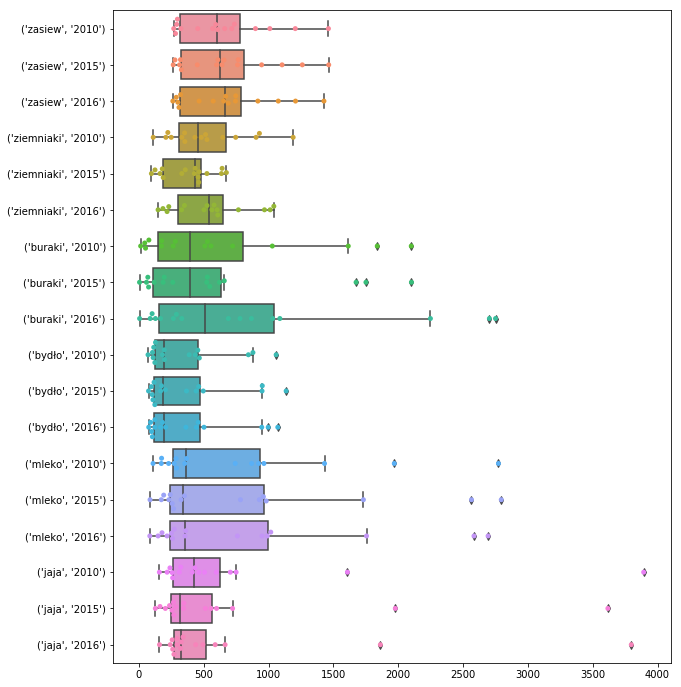

In [5]:
plt.figure(figsize=(10,12))
plot_data = data.iloc[:, :18]

sns.swarmplot(data=plot_data, orient="h")
sns.boxplot(data=plot_data, orient="h")

Na powyższych wykresach pudełkowych widać wiele wartości odstajęcych (wystających poza wartość dolnego/górnego wąsa), zwłaszcza wśród wyników produkcji rolnej. 

Aby się ich pozbyć zamienię je na wartości odpowiedniego wąsa.

In [6]:
def wąsy(dw, x, gw):
    if x < dw:
        return dw
    if x < gw:
        return x
    return gw

for i in range(data.shape[1]):
    data.iloc[:,i] = data.iloc[:,i].map(lambda x: wąsy(opis.iloc[:,i]['dolny wąs'], x, opis.iloc[:,i]['górny wąs']))
    
data

nazwa                zasiew                 ziemniaki                 buraki  \
rok                    2010    2015    2016      2010   2015    2016    2010   
Województwo                                                                    
Dolnośląskie         715.80  760.30  744.00    480.90 433.10  767.00 1028.30   
Kujawsko-pomorskie   898.50  946.00  916.90    430.90 427.40  603.00 1771.93   
Lubelskie           1009.30 1103.70 1074.40    746.10 456.00  607.80 1614.20   
Lubuskie             281.60  277.50  287.80    109.70  95.80  147.40   50.60   
Łódzkie              735.70  765.30  746.40    903.30 674.00 1040.10  280.60   
Małopolskie          290.90  313.00  299.70    524.30 524.00  524.40   44.40   
Mazowieckie         1205.60 1259.80 1207.40   1189.10 641.30 1011.70  528.10   
Opolskie             453.20  449.70  463.50    222.60 162.10  328.80  722.10   
Podkarpackie         296.30  320.20  308.40    646.00 463.80  563.00  174.30   
Podlaskie            605.80  655.60  688.30    353.90 186.90  184.90   13.00   
Pomorskie            567.90  598.60  572.50    513.50 460.60  579.30  508.10   
Śląskie              268.00  264.00  261.10    207.50 123.50  229.80   76.30   
Świętokrzyskie       323.00  327.10  321.10    330.80 330.40  350.60  263.70   
Warmińsko-mazurskie  592.10  608.70  668.80    248.50 179.70  216.60  175.20   
Wielkopolskie       1461.30 1463.50 1426.60    928.90 636.10  968.00 1771.93   
Zachodniopomorskie   660.90  640.10  653.00    351.70 357.20  501.70  555.60   

nazwa                                bydło                  mleko          \
rok                    2015    2016   2010    2015   2016    2010    2015   
Województwo                                                                 
Dolnośląskie         657.80 1086.50 109.10  107.90 103.20  172.20  190.60   
Kujawsko-pomorskie  1415.75 2377.96 465.50  495.70 501.50  868.60  928.30   
Lubelskie           1415.75 2247.90 387.00  366.30 361.80  742.40  782.70   
Lubuskie              74.00  101.20  69.80   73.80  75.30  108.40   85.20   
Łódzkie              260.70  330.10 453.70  460.40 456.20  963.60  981.50   
Małopolskie           57.80   86.50 196.60  173.50 181.20  353.00  324.60   
Mazowieckie          620.80  867.20 961.02 1001.54 993.31 1939.99 2055.39   
Opolskie             527.10 1031.20 122.60  116.50 121.60  290.20  266.60   
Podkarpackie         194.80  288.40 113.80   95.50  89.50  271.90  230.40   
Podlaskie              4.20    4.80 878.90  949.10 947.00 1939.99 2055.39   
Pomorskie            522.70  689.20 195.30  204.30 205.60  286.20  350.40   
Śląskie               68.20  127.00 127.50  122.30 122.80  228.50  240.80   
Świętokrzyskie       186.20  264.90 181.10  166.80 166.40  366.10  256.40   
Warmińsko-mazurskie  117.00  166.20 435.00  440.40 442.50  922.30  959.60   
Wielkopolskie       1415.75 2377.96 843.90  951.00 993.31 1431.10 1731.10   
Zachodniopomorskie   546.30  779.50 104.30  102.00  97.30  174.30  172.10   

nazwa                          jaja                odrzucone_mieso            \
rok                    2016    2010    2015   2016            2010 2015 2016   
Województwo                                                                    
Dolnośląskie         177.60  749.30  721.90 587.70            2.80 4.30 5.90   
Kujawsko-pomorskie   948.90  432.00  346.00 325.90            5.00 3.10 3.00   
Lubelskie            759.20  462.40  254.60 293.10            2.80 1.80 3.40   
Lubuskie              83.50  259.50  343.60 260.30            1.00 5.20 0.00   
Łódzkie              990.10  596.10  598.20 493.30            2.50 5.10 4.20   
Małopolskie          360.50  506.10  556.20 664.30            4.00 1.50 1.50   
Mazowieckie         2129.31 1170.03 1041.90 891.34            1.40 0.20 0.00   
Opolskie             272.70  238.90  126.20 158.20            0.90 0.00 0.00   
Podkarpackie         216.50  321.70  265.80 339.90            4.10 1.70 1.40   
Podlaskie           2129.31  216.80  203.30 256.20     

### Standaryzacja

In [7]:
def standaryzacja(srs):
    średnia = srs.describe()['mean']
    odchylenie = srs.describe()['std']
    return srs.map(lambda p: (p - średnia)/odchylenie)
 
std = data.apply(standaryzacja)
std

nazwa               zasiew             ziemniaki             buraki        \
rok                   2010  2015  2016      2010  2015  2016   2010  2015   
Województwo                                                                 
Dolnośląskie          0.19  0.24  0.22     -0.10  0.26  0.78   0.69  0.30   
Kujawsko-pomorskie    0.71  0.75  0.72     -0.27  0.23  0.22   1.89  1.82   
Lubelskie             1.03  1.18  1.17      0.78  0.38  0.24   1.63  1.82   
Lubuskie             -1.04 -1.08 -1.07     -1.34 -1.52 -1.34  -0.88 -0.86   
Łódzkie               0.25  0.26  0.23      1.30  1.53  1.71  -0.51 -0.49   
Małopolskie          -1.01 -0.98 -1.04      0.04  0.74 -0.05  -0.89 -0.89   
Mazowieckie           1.58  1.61  1.54      2.25  1.35  1.62  -0.11  0.23   
Opolskie             -0.55 -0.61 -0.57     -0.96 -1.17 -0.72   0.20  0.04   
Podkarpackie         -1.00 -0.96 -1.01      0.45  0.42  0.08  -0.68 -0.62   
Podlaskie            -0.12 -0.05  0.07     -0.52 -1.04 -1.21  -0.94 -1.00   
Pomorskie            -0.23 -0.20 -0.26      0.01  0.40  0.14  -0.15  0.03   
Śląskie              -1.08 -1.12 -1.15     -1.01 -1.38 -1.06  -0.84 -0.87   
Świętokrzyskie       -0.92 -0.94 -0.98     -0.60 -0.29 -0.64  -0.54 -0.64   
Warmińsko-mazurskie  -0.16 -0.17  0.01     -0.88 -1.08 -1.10  -0.68 -0.78   
Wielkopolskie         2.31  2.17  2.17      1.39  1.33  1.47   1.89  1.82   
Zachodniopomorskie    0.04 -0.09 -0.03     -0.53 -0.14 -0.13  -0.07  0.08   

nazwa                     bydło             mleko              jaja        \
rok                  2016  2010  2015  2016  2010  2015  2016  2010  2015   
Województwo                                                                 
Dolnośląskie         0.34 -0.81 -0.78 -0.79 -0.85 -0.79 -0.80  0.80  0.99   
Kujawsko-pomorskie   1.89  0.37  0.40  0.40  0.29  0.30  0.30 -0.21 -0.31   
Lubelskie            1.73  0.11  0.01 -0.01  0.08  0.08  0.03 -0.11 -0.62   
Lubuskie            -0.84 -0.94 -0.88 -0.87 -0.95 -0.94 -0.93 -0.76 -0.32   
Łódzkie             -0.56  0.34  0.29  0.27  0.44  0.38  0.35  0.31  0.56   
Małopolskie         -0.86 -0.52 -0.58 -0.55 -0.55 -0.59 -0.54  0.03  0.42   
Mazowieckie          0.08  2.02  1.93  1.88  2.04  1.96  1.97  2.14  2.10   
Opolskie             0.27 -0.76 -0.75 -0.73 -0.65 -0.68 -0.66 -0.83 -1.07   
Podkarpackie        -0.61 -0.79 -0.81 -0.83 -0.68 -0.73 -0.74 -0.56 -0.59   
Podlaskie           -0.95  1.75  1.77  1.74  2.04  1.96  1.97 -0.90 -0.80   
Pomorskie           -0.13 -0.52 -0.48 -0.48 -0.66 -0.55 -0.55 -0.59 -0.69   
Śląskie             -0.81 -0.75 -0.73 -0.73 -0.75 -0.71 -0.68  0.66  0.27   
Świętokrzyskie      -0.64 -0.57 -0.60 -0.60 -0.53 -0.69 -0.70 -0.77 -0.94   
Warmińsko-mazurskie -0.76  0.27  0.23  0.23  0.38  0.34  0.39 -1.09 -0.57   
Wielkopolskie        1.89  1.63  1.78  1.88  1.21  1.48  1.44  2.14  2.10   
Zachodniopomorskie  -0.03 -0.83 -0.79 -0.80 -0.84 -0.81 -0.84 -0.28 -0.52   

nazwa                     odrzucone_mieso             cena_ziemniak        \
rok                  2016            2010  2015  2016          2010  2015   
Województwo                                                                 
Dolnośląskie         0.74           -0.27  0.72  1.17         -0.78 -0.19   
Kujawsko-pomorskie  -0.42            0.82  0.18  0.06          0.50  0.84   
Lubelskie           -0.56           -0.27 -0.40  0.22         -0.99 -0.44   
Lubuskie            -0.71           -1.16  1.12 -1.09         -1.55 -1.09   
Łódzkie              0.32           -0.42  1.07  0.52          0.02 -0.43   
Małopolskie          1.08            0.33 -0.54 -0.51          1.13 -0.54   
Mazowieckie          2.08           -0.97 -1.12 -1.09          0.70  0.93   
Opolskie            -1.16           -1.21 -1.21 -1.09         -0.43  1.10   
Podkarpackie        -0.35            0.37 -0.45 -0.55         -1.14 -0.70   
Podlaskie           -0.72           -0.32  0.00  1.33          0.98 -1.89   
Pomorskie           -0.56           -0.67 -0.49  0.60         -1.61 -0.

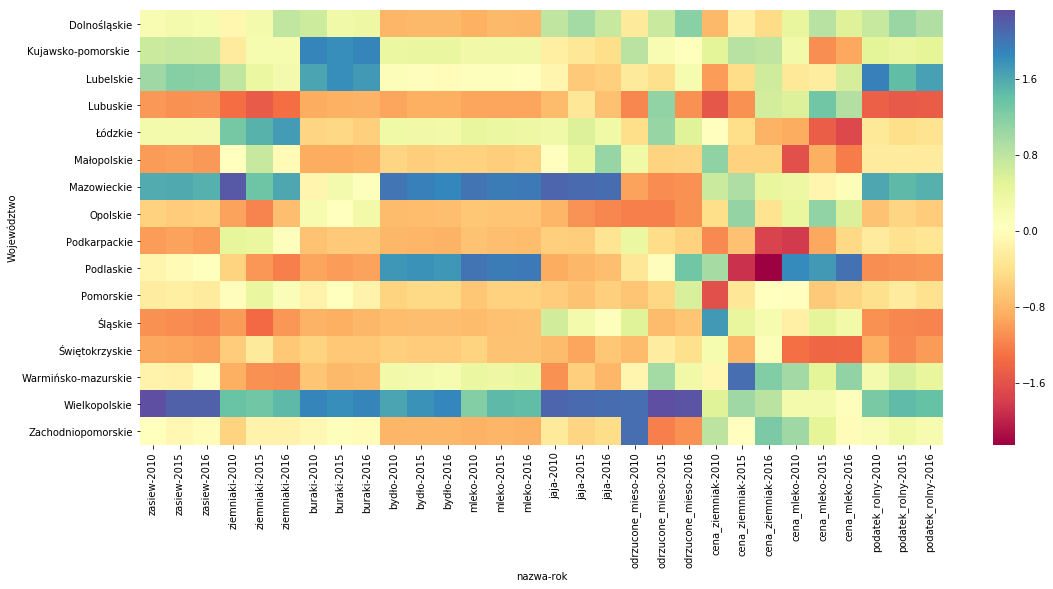

In [8]:
plt.figure(figsize=(18,8))
colormap = plt.cm.Spectral
sns.heatmap(std,  cmap=colormap)

In [9]:
# wskaźniki statystyczne danych standaryzowanych

opis_std = std.apply(lambda srs: srs.describe())
opis_std.loc['dolny wąs']  = [0] * opis.shape[1]
opis_std.loc['górny wąs']  = [0] * opis.shape[1]

# dolny_wąs i górny_wąs zdefiniowane wcześniej
opis_std.apply(dolny_wąs)
opis_std.apply(górny_wąs)

opis_std

nazwa     zasiew             ziemniaki             buraki             bydło  \
rok         2010  2015  2016      2010  2015  2016   2010  2015  2016  2010   
count      16.00 16.00 16.00     16.00 16.00 16.00  16.00 16.00 16.00 16.00   
mean        0.00 -0.00  0.00     -0.00 -0.00  0.00   0.00 -0.00 -0.00  0.00   
std         1.00  1.00  1.00      1.00  1.00  1.00   1.00  1.00  1.00  1.00   
min        -1.08 -1.12 -1.15     -1.34 -1.52 -1.34  -0.94 -1.00 -0.95 -0.94   
25%        -0.94 -0.95 -0.99     -0.67 -1.05 -0.80  -0.72 -0.80 -0.77 -0.77   
50%        -0.14 -0.13 -0.01     -0.19  0.24  0.02  -0.33 -0.23 -0.35 -0.52   
75%         0.36  0.38  0.35      0.53  0.50  0.37   0.32  0.25  0.29  0.34   
max         2.31  2.17  2.17      2.25  1.53  1.71   1.89  1.82  1.89  2.02   
dolny wąs  -2.90 -2.94 -3.00     -2.47 -3.37 -2.57  -2.29 -2.37 -2.37 -2.45   
górny wąs   2.32  2.37  2.36      2.33  2.82  2.13   1.89  1.82  1.89  2.02   

nazwa                 mleko              jaja             odrzucone_mieso  \
rok        2015  2016  2010  2015  2016  2010  2015  2016            2010   
count     16.00 16.00 16.00 16.00 16.00 16.00 16.00 16.00           16.00   
mean      -0.00  0.00 -0.00 -0.00 -0.00  0.00  0.00  0.00            0.00   
std        1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00            1.00   
min       -0.88 -0.87 -0.95 -0.94 -0.93 -1.09 -1.07 -1.16           -1.21   
25%       -0.76 -0.74 -0.70 -0.72 -0.71 -0.76 -0.64 -0.67           -0.69   
50%       -0.53 -0.52 -0.54 -0.57 -0.54 -0.24 -0.42 -0.43           -0.27   
75%        0.32  0.30  0.39  0.35  0.36  0.40  0.45  0.43            0.41   
max        1.93  1.88  2.04  1.96  1.97  2.14  2.10  2.08            2.07   
dolny wąs -2.37 -2.32 -2.34 -2.32 -2.32 -2.51 -2.28 -2.33           -2.35   
górny wąs  1.93  1.88  2.04  1.96  1.97  2.14  2.10  2.08            2.07   

nazwa                 cena_ziemniak             cena_mleko              \
rok        2015  2016          2010  2015  2016       2010  2015  2016   
count     16.00 16.00         16.00 16.00 16.00      16.00 16.00 16.00   
mean      -0.00  0.00          0.00  0.00 -0.00       0.00 -0.00 -0.00   
std        1.00  1.00          1.00  1.00  1.00       1.00  1.00  1.00   
min       -1.21 -1.09         -1.61 -1.89 -2.26      -1.83 -1.48 -1.70   
25%       -0.59 -0.77         -0.83 -0.58 -0.48      -0.45 -0.89 -0.62   
50%       -0.31 -0.17          0.12 -0.26  0.17       0.27  0.07  0.09   
75%        0.78  0.54          0.73  0.86  0.70       0.46  0.59  0.59   
max        2.32  2.28          1.72  2.06  1.25       1.84  1.73  2.05   
dolny wąs -2.65 -2.74         -3.18 -2.74 -2.26      -1.83 -3.10 -2.44   
górny wąs  2.84  2.51          3.07  3.02  2.48       1.84  2.81  2.41   

nazwa     podatek_rolny              
rok                2010  2015  2016  
count             16.00 16.00 16.00  
mean               0.00 -0.00  0.00  
std                1.00  1.00  1.00  
min               -1.45 -1.54 -1.50  
25%               -0.74 -0.64 -0.70  
50%               -0.26 -0.27 -0.29  
75%                0.56  0.71  0.59  
max                1.92  1.48  1.66  
dolny wąs         -2.69 -2.67 -2.64  
górny wąs          2.51  2.74  2.53

### Unitaryzacja

In [10]:
def unitaryzacja(srs):
    mini = srs.describe()['min']
    rozstep = srs.describe()['max'] - mini
    return srs.map(lambda p: (p - mini)/rozstep)
 
uni = data.apply(unitaryzacja)
uni

nazwa               zasiew           ziemniaki           buraki            \
rok                   2010 2015 2016      2010 2015 2016   2010 2015 2016   
Województwo                                                                 
Dolnośląskie          0.38 0.41 0.41      0.34 0.58 0.69   0.58 0.46 0.46   
Kujawsko-pomorskie    0.53 0.57 0.56      0.30 0.57 0.51   1.00 1.00 1.00   
Lubelskie             0.62 0.70 0.70      0.59 0.62 0.52   0.91 1.00 0.95   
Lubuskie              0.01 0.01 0.02      0.00 0.00 0.00   0.02 0.05 0.04   
Łódzkie               0.39 0.42 0.42      0.74 1.00 1.00   0.15 0.18 0.14   
Małopolskie           0.02 0.04 0.03      0.38 0.74 0.42   0.02 0.04 0.03   
Mazowieckie           0.79 0.83 0.81      1.00 0.94 0.97   0.29 0.44 0.36   
Opolskie              0.16 0.15 0.17      0.10 0.11 0.20   0.40 0.37 0.43   
Podkarpackie          0.02 0.05 0.04      0.50 0.64 0.47   0.09 0.14 0.12   
Podlaskie             0.28 0.33 0.37      0.23 0.16 0.04   0.00 0.00 0.00   
Pomorskie             0.25 0.28 0.27      0.37 0.63 0.48   0.28 0.37 0.29   
Śląskie               0.00 0.00 0.00      0.09 0.05 0.09   0.04 0.05 0.05   
Świętokrzyskie        0.05 0.05 0.05      0.20 0.41 0.23   0.14 0.13 0.11   
Warmińsko-mazurskie   0.27 0.29 0.35      0.13 0.15 0.08   0.09 0.08 0.07   
Wielkopolskie         1.00 1.00 1.00      0.76 0.93 0.92   1.00 1.00 1.00   
Zachodniopomorskie    0.33 0.31 0.34      0.22 0.45 0.40   0.31 0.38 0.33   

nazwa               bydło           mleko           jaja            \
rok                  2010 2015 2016  2010 2015 2016 2010 2015 2016   
Województwo                                                          
Dolnośląskie         0.04 0.04 0.03  0.03 0.05 0.05 0.58 0.65 0.59   
Kujawsko-pomorskie   0.44 0.45 0.46  0.42 0.43 0.42 0.27 0.24 0.23   
Lubelskie            0.36 0.32 0.31  0.35 0.35 0.33 0.30 0.14 0.18   
Lubuskie             0.00 0.00 0.00  0.00 0.00 0.00 0.10 0.24 0.14   
Łódzkie              0.43 0.42 0.41  0.47 0.45 0.44 0.43 0.52 0.46   
Małopolskie          0.14 0.11 0.12  0.13 0.12 0.14 0.34 0.47 0.69   
Mazowieckie          1.00 1.00 1.00  1.00 1.00 1.00 1.00 1.00 1.00   
Opolskie             0.06 0.05 0.05  0.10 0.09 0.09 0.08 0.00 0.00   
Podkarpackie         0.05 0.02 0.02  0.09 0.07 0.07 0.16 0.15 0.25   
Podlaskie            0.91 0.94 0.95  1.00 1.00 1.00 0.06 0.08 0.13   
Pomorskie            0.14 0.14 0.14  0.10 0.13 0.13 0.15 0.12 0.18   
Śląskie              0.06 0.05 0.05  0.07 0.08 0.09 0.54 0.42 0.38   
Świętokrzyskie       0.12 0.10 0.10  0.14 0.09 0.08 0.10 0.04 0.15   
Warmińsko-mazurskie  0.41 0.40 0.40  0.44 0.44 0.46 0.00 0.16 0.11   
Wielkopolskie        0.87 0.95 1.00  0.72 0.84 0.82 1.00 1.00 1.00   
Zachodniopomorskie   0.04 0.03 0.02  0.04 0.04 0.03 0.25 0.17 0.22   

nazwa               odrzucone_mieso           cena_ziemniak            \
rok                            2010 2015 2016          2010 2015 2016   
Województwo                                                             
Dolnośląskie                   0.29 0.54 0.67          0.25 0.43 0.51   
Kujawsko-pomorskie             0.62 0.39 0.34          0.64 0.69 0.87   
Lubelskie                      0.29 0.23 0.39          0.19 0.37 0.84   
Lubuskie                       0.02 0.66 0.00          0.02 0.20 0.83   
Łódzkie                        0.24 0.65 0.48          0.49 0.37 0.40   
Małopolskie                    0.47 0.19 0.17          0.82 0.34 0.49   
Mazowieckie                    0.08 0.03 0.00          0.69 0.71 0.77   
Opolskie                       0.00 0.00 0.00          0.35 0.76 0.54   
Podkarpackie                   0.48 0.22 0.16          0.14 0.30 0.15   
Podlaskie                      0.27 0.34 0.72          0.78 0.00 0.00   
Pomorskie                      0.17 0.20 0.50          0.00 0.40 0.65   
Śląskie                        0.53 0.13 0.12          1.00 0.59 0.71   
Świętokrzyskie                 0.14 0.28 0.20          0.55 0.27 0.68   
Warmińsko-mazurskie            0.33 0

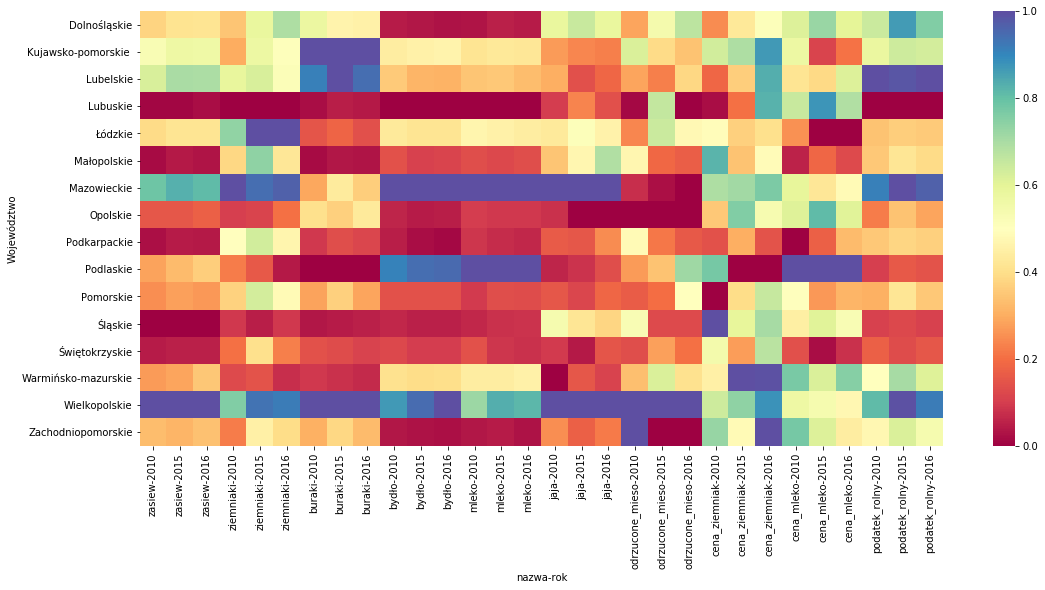

In [11]:
plt.figure(figsize=(18,8))
sns.heatmap(uni, cmap=plt.cm.Spectral)

In [12]:
# wskaźniki statystyczne danych unitaryzowanych

opis_uni = uni.apply(lambda srs: srs.describe())
opis_uni.loc['dolny wąs']  = [0] * opis.shape[1]
opis_uni.loc['górny wąs']  = [0] * opis.shape[1]

# dolny_wąs i górny_wąs zdefiniowane wcześniej
opis_uni.apply(dolny_wąs)
opis_uni.apply(górny_wąs)

opis_uni

nazwa     zasiew             ziemniaki             buraki             bydło  \
rok         2010  2015  2016      2010  2015  2016   2010  2015  2016  2010   
count      16.00 16.00 16.00     16.00 16.00 16.00  16.00 16.00 16.00 16.00   
mean        0.32  0.34  0.35      0.37  0.50  0.44   0.33  0.36  0.34  0.32   
std         0.30  0.30  0.30      0.28  0.33  0.33   0.35  0.35  0.35  0.34   
min         0.00  0.00  0.00      0.00  0.00  0.00   0.00  0.00  0.00  0.00   
25%         0.04  0.05  0.05      0.19  0.15  0.18   0.08  0.07  0.06  0.06   
50%         0.28  0.30  0.34      0.32  0.58  0.44   0.22  0.27  0.21  0.14   
75%         0.43  0.46  0.45      0.52  0.66  0.56   0.45  0.44  0.44  0.43   
max         1.00  1.00  1.00      1.00  1.00  1.00   1.00  1.00  1.00  1.00   
dolny wąs  -0.54 -0.56 -0.56     -0.32 -0.61 -0.40  -0.48 -0.48 -0.50 -0.51   
górny wąs   1.00  1.06  1.06      1.02  1.42  1.14   1.00  1.00  1.00  1.00   

nazwa                 mleko              jaja             odrzucone_mieso  \
rok        2015  2016  2010  2015  2016  2010  2015  2016            2010   
count     16.00 16.00 16.00 16.00 16.00 16.00 16.00 16.00           16.00   
mean       0.31  0.32  0.32  0.33  0.32  0.34  0.34  0.36            0.37   
std        0.36  0.36  0.33  0.34  0.34  0.31  0.32  0.31            0.30   
min        0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00            0.00   
25%        0.04  0.05  0.08  0.08  0.08  0.10  0.14  0.15            0.16   
50%        0.12  0.13  0.14  0.13  0.13  0.26  0.21  0.22            0.29   
75%        0.43  0.43  0.45  0.45  0.45  0.46  0.48  0.49            0.50   
max        1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00            1.00   
dolny wąs -0.53 -0.53 -0.47 -0.48 -0.48 -0.44 -0.38 -0.36           -0.35   
górny wąs  1.00  1.00  1.00  1.00  1.00  1.00  1.00  1.00            1.00   

nazwa                 cena_ziemniak             cena_mleko              \
rok        2015  2016          2010  2015  2016       2010  2015  2016   
count     16.00 16.00         16.00 16.00 16.00      16.00 16.00 16.00   
mean       0.34  0.32          0.48  0.48  0.64       0.50  0.46  0.45   
std        0.28  0.30          0.30  0.25  0.28       0.27  0.31  0.27   
min        0.00  0.00          0.00  0.00  0.00       0.00  0.00  0.00   
25%        0.17  0.09          0.23  0.33  0.51       0.38  0.18  0.29   
50%        0.25  0.27          0.52  0.41  0.69       0.57  0.48  0.48   
75%        0.56  0.48          0.70  0.70  0.84       0.62  0.64  0.61   
max        1.00  1.00          1.00  1.00  1.00       1.00  1.00  1.00   
dolny wąs -0.41 -0.49         -0.47 -0.22  0.00       0.00 -0.51 -0.20   
górny wąs  1.15  1.07          1.41  1.24  1.35       1.00  1.34  1.10   

nazwa     podatek_rolny              
rok                2010  2015  2016  
count             16.00 16.00 16.00  
mean               0.43  0.51  0.47  
std                0.30  0.33  0.32  
min                0.00  0.00  0.00  
25%                0.21  0.30  0.25  
50%                0.35  0.42  0.38  
75%                0.60  0.75  0.66  
max                1.00  1.00  1.00  
dolny wąs         -0.37 -0.38 -0.36  
górny wąs          1.17  1.42  1.27

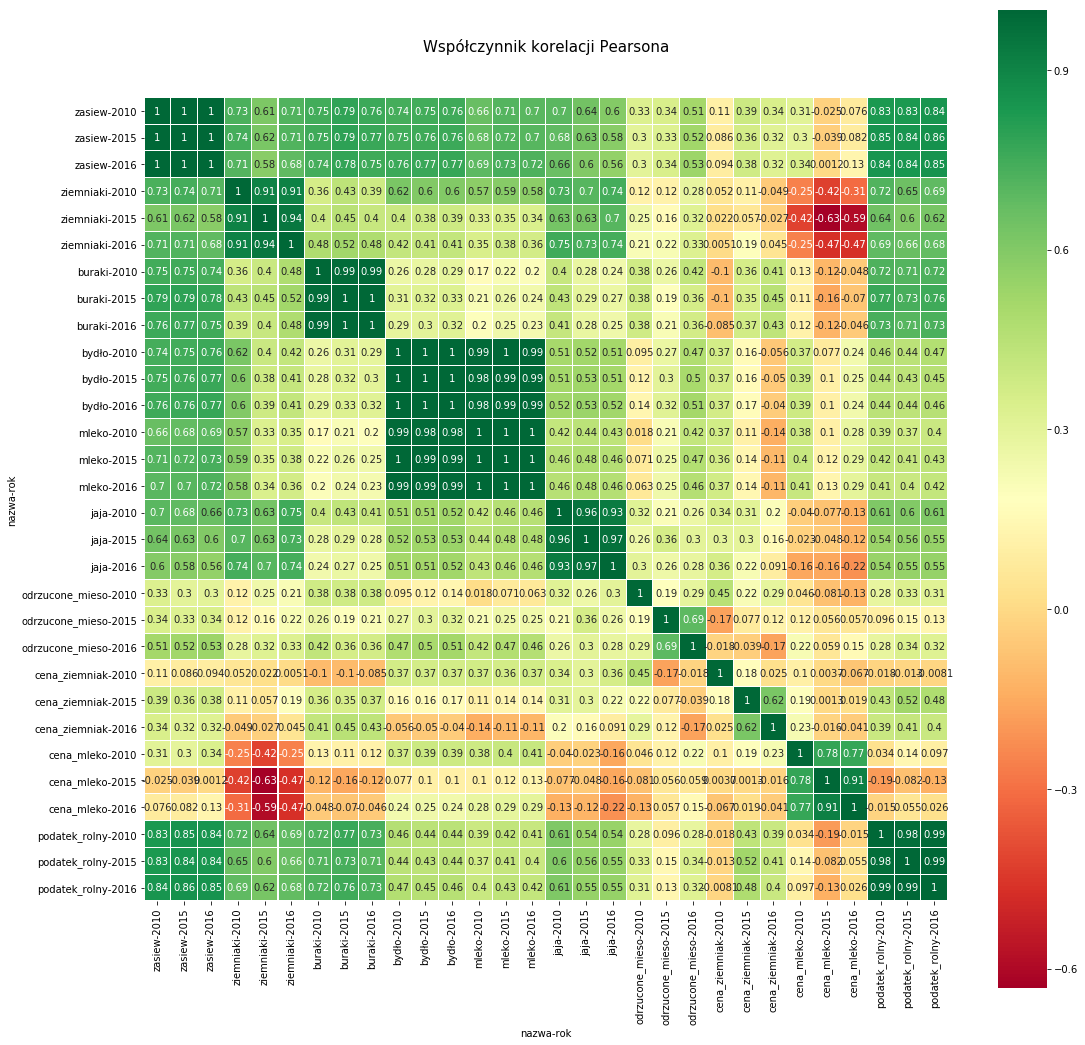

In [13]:
# colormap = plt.cm.RdBu
colormap = plt.cm.RdYlGn
plt.figure(figsize=(18,18))
plt.title('Współczynnik korelacji Pearsona', y=1.05, size=15)
sns.heatmap(uni.astype(float).corr(),linewidths=0.05, # vmax=1.0, vmin = -1,
            square=True, cmap=colormap, annot=True)
# sns.heatmap(uni.astype(float).corr(),linewidths=0.05, square=True, cmap=colormap, xticklabels=3, yticklabels=3)

## Obserwacje i wnioski
- Korelacje:
  - powierzchnia zasiewów wykazuje wysoką korelację ze wszytkimi wskaźnikami produkcji rolnej (w tym hodowli)
  - bardzo silnie skorelowana jest liczebność bydła i produkcja mleka
  - wielkość zbiorów ziemniak jest silnie skorelowana ze wskaźnikami dotyczącymi chodowli
  - zastanawiającą ujemną korelację wykazują: wielkość zbiorów ziemniaka i cena skupu mleka
- punkt

## Inne wykresy
_ładne, niekowniecznie sensowne_

<Figure size 1440x1440 with 0 Axes>

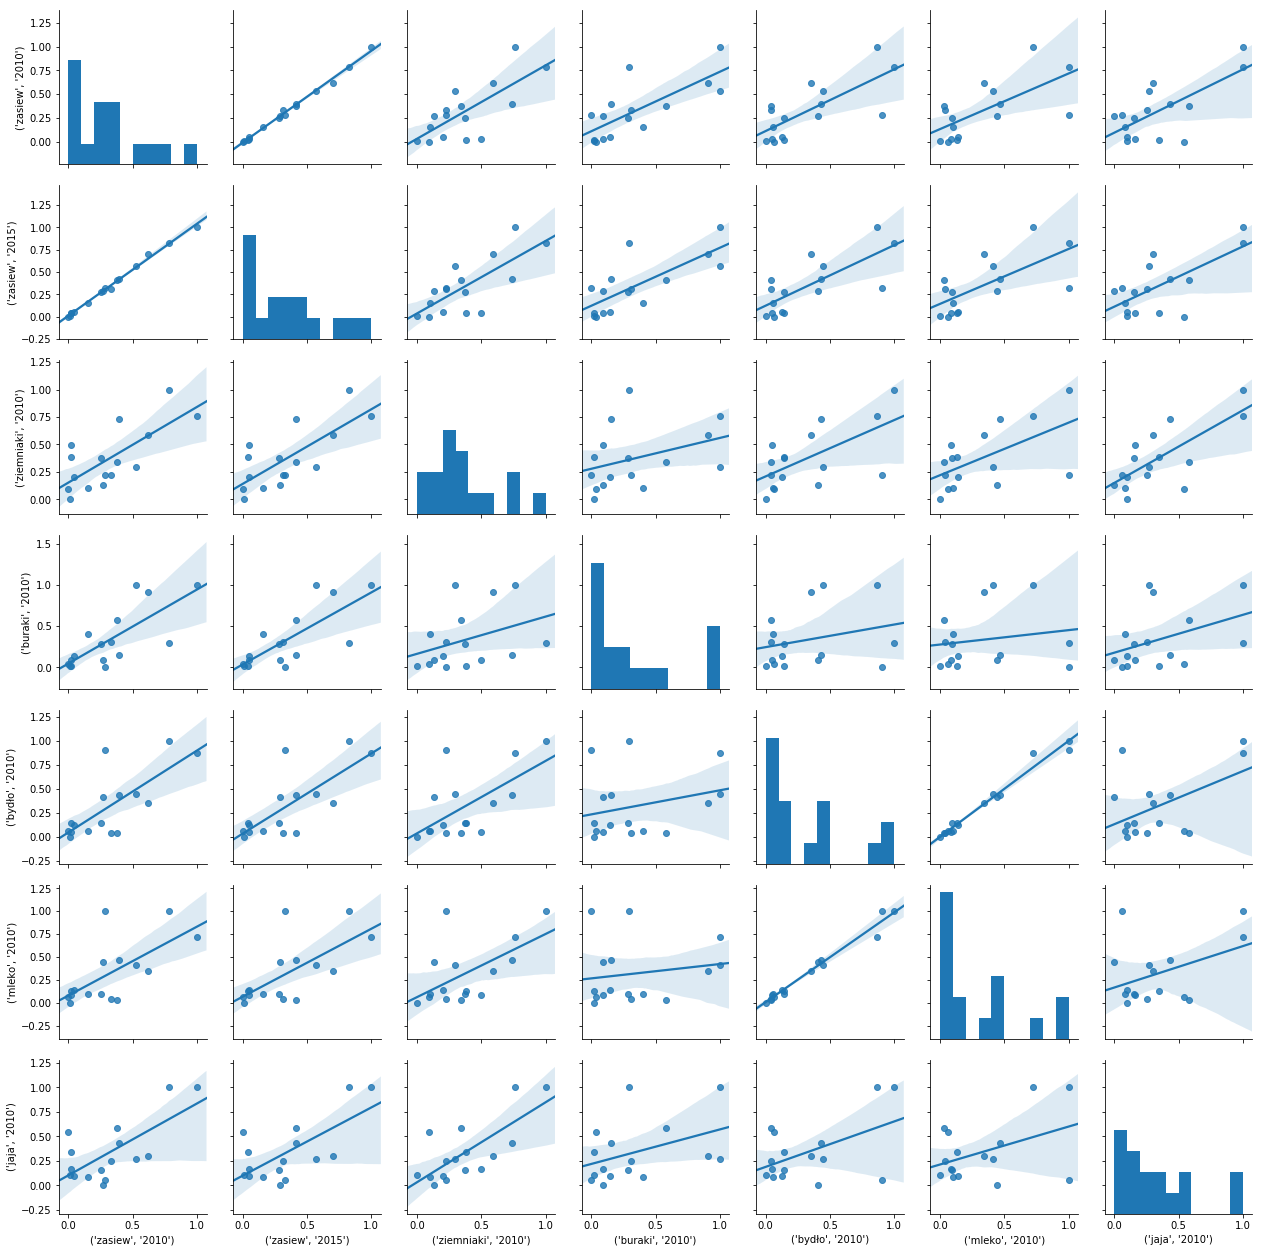

In [14]:
plt.figure(figsize=(20,20))
sns.pairplot(uni.iloc[:,[0,1,3,6,9,12,15]], kind="reg")

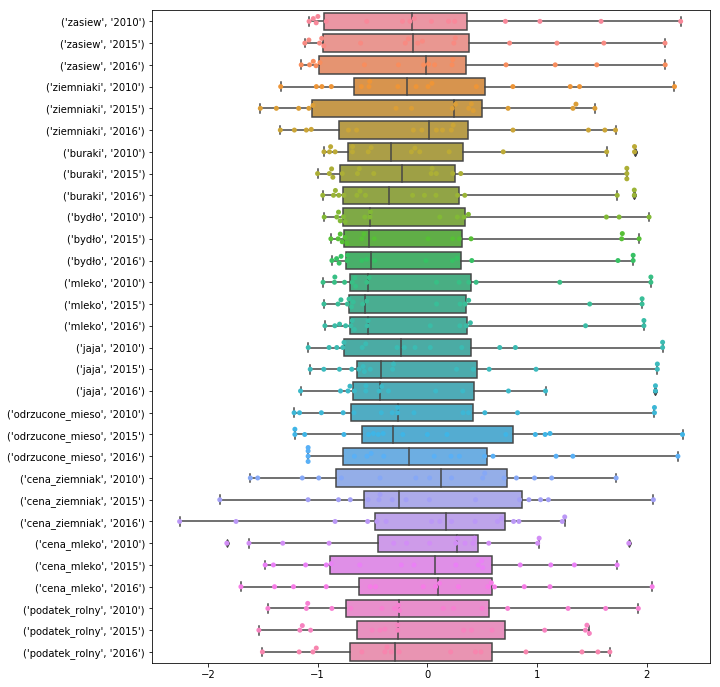

In [15]:
plt.figure(figsize=(10,12))
plot_data = std

sns.swarmplot(data=plot_data, orient="h")
sns.boxplot(data=plot_data, orient="h")